In [2]:
import matplotlib.pyplot as plt
import matplotlib as mpl
import numpy as np
from numpy import sqrt
import pandas as pd
import scipy.constants as const
from scipy.signal import find_peaks, peak_widths
from scipy.optimize import curve_fit                        # Funktionsfit:     popt, pcov = curve_fit(func, xdata, ydata) 
from uncertainties import ufloat                            # Fehler:           fehlerwert =  ulfaot(x, err)
from uncertainties import unumpy as unp 
from uncertainties.unumpy import uarray                     # Array von Fehler: fehlerarray =  uarray(array, errarray)
from uncertainties.unumpy import (nominal_values as noms,   # Wert:             noms(fehlerwert) = x
                                  std_devs as stds)         # Abweichung:       stds(fehlerarray) = errarray

from scipy.stats import norm

Tabelle erstellen:

In [3]:
dscan_data = pd.read_csv('tables/detektorscan.txt', delim_whitespace="\t")
latex_table = dscan_data.to_latex(index=False, column_format="c c", decimal=',', header=[r'$\theta$', r'$I$'], escape=False)
print(latex_table)

\begin{tabular}{c c}
\toprule
$\theta$ &    $I$ \\
\midrule
   -0,30 &   1836 \\
   -0,29 &   2122 \\
   -0,28 &   2236 \\
   -0,27 &   2418 \\
   -0,26 &   2579 \\
   -0,25 &   2644 \\
   -0,24 &   3160 \\
   -0,23 &   3646 \\
   -0,22 &   4368 \\
   -0,21 &   4898 \\
   -0,20 &   5479 \\
   -0,19 &   6142 \\
   -0,18 &   6781 \\
   -0,17 &   7939 \\
   -0,16 &   9296 \\
   -0,15 &  11164 \\
   -0,14 &  13036 \\
   -0,13 &  15916 \\
   -0,12 &  20495 \\
   -0,11 &  26592 \\
   -0,10 &  34614 \\
   -0,09 &  45569 \\
   -0,08 &  60869 \\
   -0,07 &  92128 \\
   -0,06 & 141444 \\
   -0,05 & 198646 \\
   -0,04 & 249182 \\
   -0,03 & 318370 \\
   -0,02 & 392259 \\
   -0,01 & 456486 \\
    0,00 & 506208 \\
    0,01 & 505924 \\
    0,02 & 445386 \\
    0,03 & 351661 \\
    0,04 & 252666 \\
    0,05 & 175980 \\
    0,06 & 124592 \\
    0,07 &  98877 \\
    0,08 &  69837 \\
    0,09 &  52169 \\
    0,10 &  36003 \\
    0,11 &  27611 \\
    0,12 &  22698 \\
    0,13 &  19287 \\
    0,14 &  1789

/tmp/ipykernel_27996/1043202770.py:2: FutureWarning: In future versions `DataFrame.to_latex` is expected to utilise the base implementation of `Styler.to_latex` for formatting and rendering. The arguments signature may therefore change. It is recommended instead to use `DataFrame.style.to_latex` which also contains additional functionality.
  latex_table = dscan_data.to_latex(index=False, column_format="c c", decimal=',', header=[r'$\theta$', r'$I$'], escape=False)


Daten auswerten:

## X-Scan

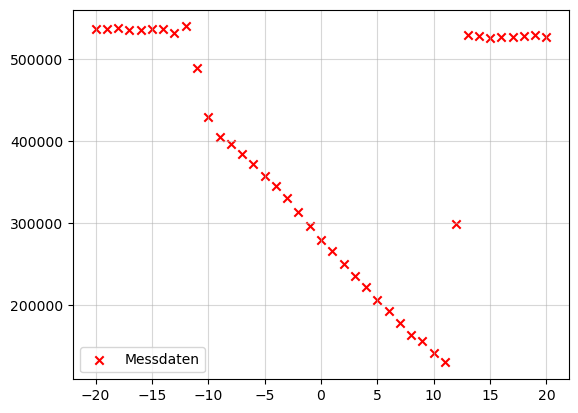

In [126]:
x, Intensity = np.genfromtxt('tables/x_scan1.txt', unpack=True)

fig, ax = plt.subplots()

ax.scatter(x, Intensity, marker='x', c='r', label='Messdaten')
ax.grid('::', alpha=0.5)
ax.legend(loc='best')
plt.show()

## Detektorscan

I_max = 488878.3942458265
FWHM = 0.08632353670031782


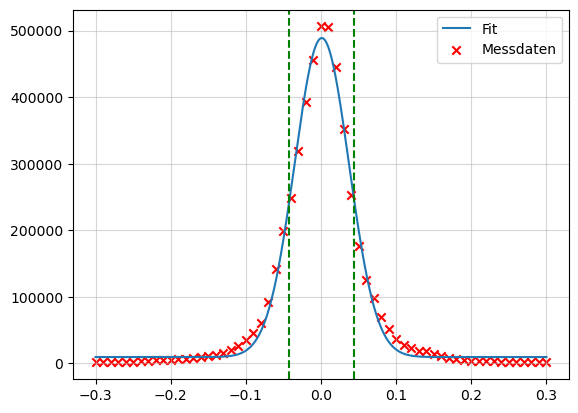

In [27]:
from scipy.optimize import fsolve

theta, I = np.genfromtxt('tables/detektorscan.txt', unpack=True, skip_header=1)

def gauss(theta, A, mean, scale, b):
    return A * norm.pdf(theta, loc=mean, scale=scale) + b

popt, pcov = curve_fit(gauss, theta, I, p0=[10000, 0, 0.1, 1])
A = ufloat(popt[0], np.sqrt(np.diag(pcov))[0])
mean = ufloat(popt[1], np.sqrt(np.diag(pcov))[1])
scale = ufloat(popt[2], np.sqrt(np.diag(pcov))[2])
b = ufloat(popt[3], np.sqrt(np.diag(pcov))[3])

fig, ax = plt.subplots()
x_fit = np.linspace(np.min(theta), np.max(theta), 1000)
ax.plot(x_fit, gauss(x_fit, *popt), label='Fit')
ax.scatter(theta, I, marker='x', c='r', label='Messdaten')


half_max = gauss(noms(mean), *popt) / 2

roots = fsolve(lambda x: gauss(x, *popt) - half_max, x0=[-0.2,0.2])
for root in roots:
    ax.axvline(root, color='g', linestyle='--')

print(f'I_max = {gauss(noms(mean), *popt)}')
print(f'FWHM = {np.abs(roots[1] - roots[0])}')

ax.grid('::', alpha=0.5)
ax.legend(loc='best')
plt.show()

## Z Scan

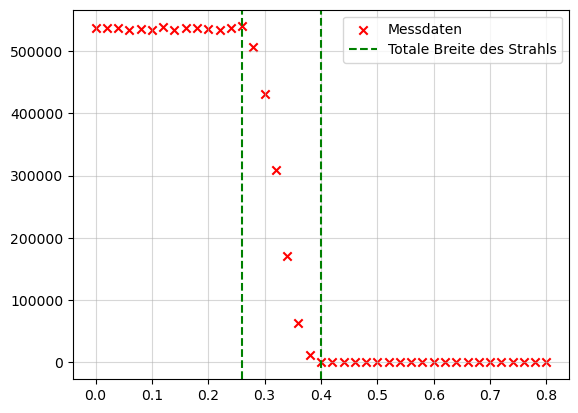

d0=0.140


In [199]:
z, Intensity = np.genfromtxt('tables/z_scan1.txt', unpack=True)

fig, ax = plt.subplots()

ax.scatter(z, Intensity, marker='x', c='r', label='Messdaten')
ax.axvline(z[13], color='g', linestyle='--')
ax.axvline(z[20], color='g', linestyle='--', label='Totale Breite des Strahls')

ax.grid('::', alpha=0.5)
ax.legend(loc='best')
plt.show()

d0 = z[20] - z[13]
print(f'{d0=:.3f}')

## Rockingscan

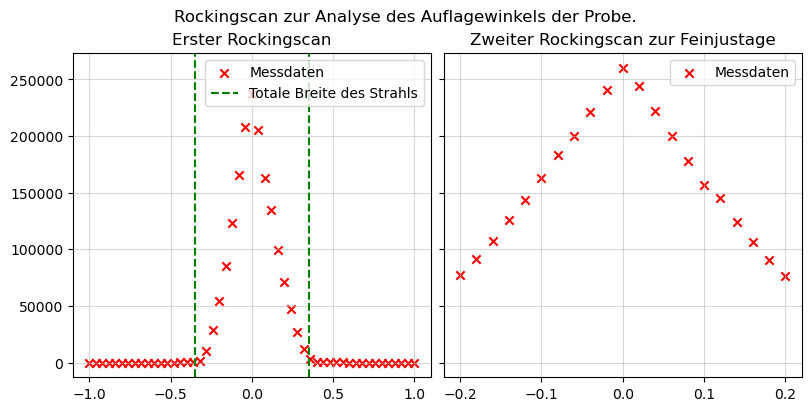

Theoretischer Wert des Geometriewinkels: 0.40107373207253


In [184]:
theta, Intensity = np.genfromtxt('tables/rockingscan_1_3.txt', unpack=True)

fig, ax = plt.subplots(1, 2, figsize=(8,4), layout='constrained', sharey=True)
ax = np.ravel(ax)

ax[0].scatter(theta, Intensity, marker='x', c='r', label='Messdaten')
ax[0].set(
    title='Erster Rockingscan',
)

geomwinkel = 0.35

ax[0].axvline(theta[np.argmax(Intensity)] + geomwinkel, color='g', linestyle='--')
ax[0].axvline(theta[np.argmax(Intensity)] - geomwinkel, color='g', linestyle='--')

theta, Intensity = np.genfromtxt('tables/rockingscan_1_4.txt', unpack=True)
ax[1].scatter(theta, Intensity, marker='x', c='r', label='Messdaten')
ax[1].set(
    title='Zweiter Rockingscan zur Feinjustage',
)

for i, axis in enumerate(ax):
    axis.grid('::', alpha=0.5)
    axis.legend(loc='best')

plt.suptitle('Rockingscan zur Analyse des Auflagewinkels der Probe.')
plt.show()

print(f'Theoretischer Wert des Geometriewinkels: {np.rad2deg(np.arcsin(0.14 / 20))}')

## Messung

In [622]:
theta, Intensity = np.genfromtxt('tables/Messung1.txt', unpack=True)
theta, Intensity1 = np.genfromtxt('tables/Messung2.txt', unpack=True)

In [623]:
# data = np.c_[theta, Intensity, Intensity1]
df = pd.DataFrame(data=np.c_[theta, Intensity, Intensity1])

hea = list([r'$\theta$', r'$I_{normal}$',r'$I_{diffuse}$'])
df_table = df.to_latex(index = False, column_format= "c c c", decimal=',', header=hea, label='tab:messreihe1', caption='Messdaten der normalen und diffusen Messung.', escape=False)
# with open('build/messdaten_myonen_1.txt', 'w') as f:
#     f.write(df_table)

# print(df_table)

/tmp/ipykernel_27996/55185976.py:5: FutureWarning: In future versions `DataFrame.to_latex` is expected to utilise the base implementation of `Styler.to_latex` for formatting and rendering. The arguments signature may therefore change. It is recommended instead to use `DataFrame.style.to_latex` which also contains additional functionality.
  df_table = df.to_latex(index = False, column_format= "c c c", decimal=',', header=hea, label='tab:messreihe1', caption='Messdaten der normalen und diffusen Messung.', escape=False)


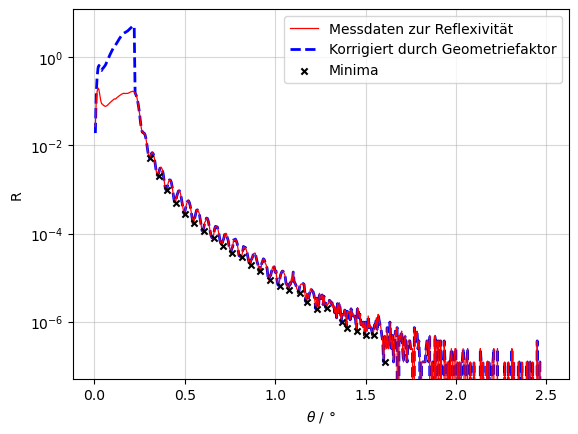

In [651]:
from scipy.signal import argrelextrema
fig, ax = plt.subplots()

def geometriefaktor(theta):
    mask = theta > 0.223
    result = np.zeros_like(theta, dtype=float)

    result[mask] = 1
    result[~mask] = 20 * np.sin(theta[~mask]) / d0
    return result

R = (Intensity - Intensity1) / (5 * np.max((Intensity - Intensity1)))
R_korrektur =  R * geometriefaktor(theta)
ax.plot(theta[1:], R[1:], ls='-', c='r', label='Messdaten zur Reflexivität', lw = 0.9, zorder=3)
ax.plot(theta[1:], R_korrektur[1:], ls='--', c='b', label='Korrigiert durch Geometriefaktor',lw=2)
ax.grid('::', alpha=0.5)
ax.legend(loc='best')
ax.set(
    yscale='log',
    xlabel=r'$\theta$ / °',
    ylabel='R',
)

minima_indices = argrelextrema(R_korrektur, np.less, order=5)
minima_theta = theta[1:][minima_indices]
minima_R = R_korrektur[minima_indices]

ax.scatter(minima_theta, minima_R, c='black', label='Minima', s=20, marker='x', zorder=5)
ax.legend(loc='best')
plt.show()

### Rechnungen

##### Kiessig Osz. Abstand

In [625]:
diff = np.zeros(len(minima_theta) -1)
for i in np.arange(len(minima_theta) - 1):
    diff[i] = minima_theta[i+1] - minima_theta[i]

# diff = diff[diff < np.quantile(diff, 0.9)]
diff = ufloat(np.mean(diff), np.std(diff))

print(diff)

0.059+/-0.022


#### Schichtdicke

In [626]:
1.541 * 10**-10 / (2 * diff)

1.2996385542168675e-09+/-4.874737077911921e-10

## Vergleich

/tmp/ipykernel_27996/4038400275.py:16: RuntimeWarning: overflow encountered in exp
  r12 = (kz1 - kz2) / (kz1 + kz2) * np.exp(-2j * kz1 * kz2 * sigma1**2)
/tmp/ipykernel_27996/4038400275.py:19: RuntimeWarning: overflow encountered in exp
  x2 = np.exp(-(kz2 * d2) * 2j) * r23
/tmp/ipykernel_27996/4038400275.py:19: RuntimeWarning: invalid value encountered in multiply
  x2 = np.exp(-(kz2 * d2) * 2j) * r23
/tmp/ipykernel_27996/4038400275.py:20: RuntimeWarning: invalid value encountered in true_divide
  x1 = (r12 + x2) / (1 + r12 * x2)
/tmp/ipykernel_27996/4038400275.py:17: RuntimeWarning: overflow encountered in exp
  r23 = (kz2 - kz3) / (kz2 + kz3) * np.exp(-2j * kz2 * kz3 * sigma2**2)
/tmp/ipykernel_27996/4038400275.py:17: RuntimeWarning: invalid value encountered in multiply
  r23 = (kz2 - kz3) / (kz2 + kz3) * np.exp(-2j * kz2 * kz3 * sigma2**2)
/tmp/ipykernel_27996/4038400275.py:20: RuntimeWarning: invalid value encountered in add
  x1 = (r12 + x2) / (1 + r12 * x2)
/tmp/ipykernel_2799

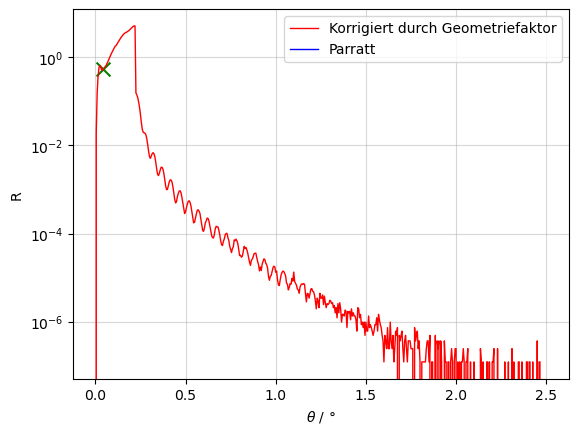

[1. 1. 1. 1. 1. 1. 1.]


In [653]:
lam = 1.541 * 10**-10
n1 = 1
d1 = 0

def parratt_alg(a_i, delta2, delta3, sigma1, sigma2, beta2, beta3, d2):

    n2 = 1 - delta2 + beta2 * 1j #Brechungsindizes definieren
    n3 = 1 - delta3 + beta3 * 1j

    a_i = np.deg2rad(a_i)
    k = 2 * np.pi / lam # Wellenvektor
    kz1 = k * np.sqrt((n1 ** 2 - np.cos(a_i) ** 2))
    kz2 = k * np.sqrt((n2 ** 2 - np.cos(a_i) ** 2))
    kz3 = k * np.sqrt((n3 ** 2 - np.cos(a_i) ** 2))

    r12 = (kz1 - kz2) / (kz1 + kz2) * np.exp(-2j * kz1 * kz2 * sigma1**2)
    r23 = (kz2 - kz3) / (kz2 + kz3) * np.exp(-2j * kz2 * kz3 * sigma2**2)

    x2 = np.exp(-(kz2 * d2) * 2j) * r23
    x1 = (r12 + x2) / (1 + r12 * x2)
    return np.abs(x1)**2

R_fit = np.copy(R_korrektur) 
theta_fit = theta[9:]
R_fit = R_fit[9:]
# R_fit[:296] = 1
# popt, pcov = curve_fit(parratt_alg, theta[10:], R_korrektur[9:], p0=[10**-6, 10**-6, 10**-10, 10**-10, 10**-8], maxfev=1000000)
popt, pcov = curve_fit(parratt_alg, theta_fit, R_fit,
                    #    p0=[10**-6, 10**-6, 10**-8, 10**-8, 10**-6],
                    #    p0=[7.6 * 10**-8, 3.5 * 10**-8, 10**-10],
                       maxfev=1000000,
                       )

fig, ax = plt.subplots()
# ax.plot(theta[1:], R, ls='-', c='r', label='Messdaten zur Reflexivität', lw = 0.9, zorder=3)
ax.plot(theta, R_korrektur, ls='-', c='r', label='Korrigiert durch Geometriefaktor',lw=1)
fitted_vals = parratt_alg(theta, *popt)
ax.plot(theta[50:], fitted_vals[50:], ls='-', c='b', label='Parratt',lw=1)
ax.scatter(theta_fit[0], R_fit[0], s=100, marker='x', c='g')
ax.scatter(theta_fit[-1], R_fit[-1], s=100, marker='x', c='g')
ax.grid('::', alpha=0.5) 
ax.legend(loc='best')
ax.set(
    yscale='log',
    xlabel=r'$\theta$ / °',
    ylabel='R',
)

plt.show()

print(popt)

d:  8.6000e-08
delta_2:  1.0000e-06
delta_3:  7.0000e-06
sigma_1:  8.0000e-10
sigma_2:  6.8000e-10


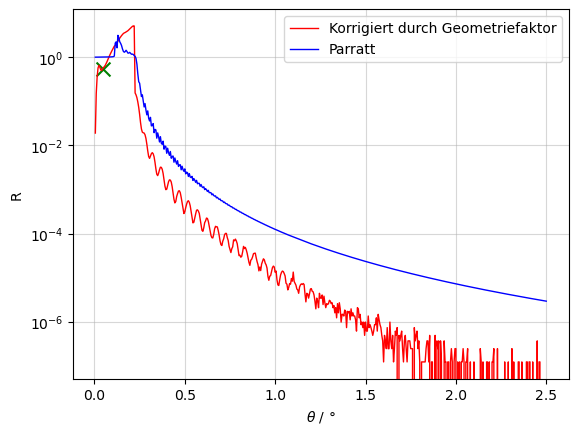

[ 5.33719684e-07  1.90385323e-06  8.31486164e-06 -2.42117807e-09
 -1.38715702e-12]


In [658]:
def parratt_algorithm(alpha, d, delta_2, delta_3, sigma_1, sigma_2):
    """Berechnet die Gesamtreflektivität an einem 2-Schichtensystem.

        Parameters
        ----------
        alpha: float
            angle at which the reflectivity is computed
        d: float
            thickness of the thin polysterol layer
        delta_2: float
            delta_2 = 1 - n_2, where n_2 is the refractive index of polysterol
        delta_3: float
            delta_3 = 1 - n_3, where n_2 is the refractive index of silizium
        sigma_2: float
            roughness of the polysterol layer
        sigma_3: float
            roughness of the silizium layer

        Returns
        -------
        R: float
            entire reflectivity for the two-layer-system
    """
    lam = 1.54*10**(-10)
    k = 2*np.pi/lam
    mu_2 = 400
    mu_3 = 14100

    n_1 = 1
    # n_2 = 1 - delta_2 + 1j*lam/(4*np.pi)*mu_2
    n_2 = 1 - delta_2 + 1j * delta_2 / 200
    # n_3 = 1 - delta_3 + 1j*lam/(4*np.pi)*mu_3
    n_3 = 1 - delta_3 + 1j * delta_3 / 40
    
    k_z1 = k * np.sqrt(n_1**2 - np.cos(np.deg2rad(alpha))**2)
    k_z2 = k * np.sqrt(n_2**2 - np.cos(np.deg2rad(alpha))**2)
    k_z3 = k * np.sqrt(n_3**2 - np.cos(np.deg2rad(alpha))**2)

    r_1 = np.exp(-2 * k_z1 * k_z2 * sigma_1**2) * (k_z1 - k_z2) / (k_z1 + k_z2)
    r_2 = np.exp(-2 * k_z2 * k_z3 * sigma_2**2) * (k_z2 - k_z3) / (k_z2 + k_z3)

    X_2 = np.exp(-2j*k_z2 * d) * r_2
    # X_1 = np.exp(-2j*k_z1 * z_1) * (r_1 + X_2 * np.exp(2j*k_z2 * z_1)) / (1 + r_1 * X_2 * np.exp(2j*k_z2 * z_1))
    X_1 = (r_1 + X_2) / (1 + r_1 * X_2)

    R = np.abs(X_1)**2

    return R

d = 8.6*10**(-8)
delta_2 = 1 * 10**(-6)
delta_3 = 7 * 10**(-6)
sigma_1 = 8 * 10**(-10)
sigma_2 = 6.8 * 10**(-10)

anfangswerte = ([d, delta_2, delta_3, sigma_1, sigma_2])

popt, pcov = curve_fit(parratt_algorithm,
                       theta[:],
                       R_korrektur[:],
                       p0=anfangswerte,
                       maxfev=100000,
                       method='lm',
                       )

for name, param in zip(('d', 'delta_2','delta_3', 'sigma_1', 'sigma_2'), anfangswerte):
    print(r'{0}:  {1:.4e}'.format(name, param))


fig, ax = plt.subplots()
ax.plot(theta[1:], R_korrektur[1:], ls='-', c='r', label='Korrigiert durch Geometriefaktor',lw=1)
fitted_vals = parratt_algorithm(theta, *popt)
ax.plot(theta[1:], fitted_vals[1:], ls='-', c='b', label='Parratt',lw=1)
ax.scatter(theta_fit[0], R_fit[0], s=100, marker='x', c='g')
ax.scatter(theta_fit[-1], R_fit[-1], s=100, marker='x', c='g')
ax.grid('::', alpha=0.5) 
ax.legend(loc='best')
ax.set(
    yscale='log',
    xlabel=r'$\theta$ / °',
    ylabel='R',
)

plt.show()

print(popt)